# Transient ERF

In [ ]:
# From the RFMIP paper:
# "Transient ERFs will be computed by differencing top-of-atmosphere energy diagnostics
# from three ensemble members employing time varying forcing-agent changes with the energy budget diagnostics
# from the 30-year control simulation. These integrations will
# use the same prescribed preindustrial climatology of SST
# and sea ice as in the time-slice ERF experiments. "

# check the paper for more info


In [ ]:
# From Forster et al. (2016):
# "Conceptually, the ERF that is most representative of a model's response would come from applying the time-varying SSTs
# and sea ice from the equivalently forced coupled model run in the ERF calculation. 
# This is the ERF_trans method proposed by AerChemMIP [Collins et al., 2016]."

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

In [6]:
# print out models and members where I have piClim-histall and piClim-control data:
experiments = {}
directory = '../Processed_data/Global_annual_means/'
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']

for model in model_names:
    experiments[model] = {}
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    
    if 'piClim-histall' in modelexp_names:
        exp = 'piClim-histall'
        experiments[model][exp] = {}
        modelexpdirectory = os.path.join(modeldirectory, exp)
        filenames = [f.name for f in os.scandir(modelexpdirectory) if f.name !='.ipynb_checkpoints']

        members = [file.rsplit('_')[2] for file in filenames]
        members.sort()
        experiments[model][exp] = members
        
        if 'piClim-control' in modelexp_names:
            exp = 'piClim-control'
            experiments[model][exp] = {}
            modelexpdirectory = os.path.join(modeldirectory, exp)
            filenames = [f.name for f in os.scandir(modelexpdirectory) if f.name !='.ipynb_checkpoints']

            members = [file.rsplit('_')[2] for file in filenames]
            members.sort()
            experiments[model][exp] = members
            
    if bool(experiments[model]) == False: # delete element if empty
        del experiments[model]
        
experiments

{'NorESM2-LM': {'piClim-histall': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
  'piClim-control': ['r1i1p1f1', 'r1i1p2f1']},
 'HadGEM3-GC31-LL': {'piClim-histall': ['r1i1p1f3', 'r2i1p1f3', 'r3i1p1f3'],
  'piClim-control': ['r1i1p1f3']},
 'GISS-E2-1-G': {'piClim-histall': ['r1i1p1f1', 'r1i1p1f2', 'r1i1p3f2'],
  'piClim-control': ['r1i1p1f1', 'r1i1p1f2', 'r1i1p3f1']},
 'CNRM-CM6-1': {'piClim-histall': ['r1i1p1f2'],
  'piClim-control': ['r1i1p1f2']},
 'IPSL-CM6A-LR': {'piClim-histall': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
  'piClim-control': ['r1i1p1f1',
   'r2i1p1f1',
   'r3i1p1f1',
   'r4i1p1f1',
   'r5i1p1f1']},
 'MIROC6': {'piClim-histall': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
  'piClim-control': ['r11i1p1f1', 'r1i1p1f1']},
 'GFDL-CM4': {'piClim-histall': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
  'piClim-control': ['r1i1p1f1']},
 'CanESM5': {'piClim-histall': ['r1i1p2f1', 'r2i1p2f1', 'r3i1p2f1'],
  'piClim-control': ['r1i1p2f1']}}

## Compute ERF for one model

In [7]:
# choose model and load data

model = 'IPSL-CM6A-LR'; member = 'r1i1p1f1'

# load files:
piclimcontrol_path = '../Processed_data/Global_annual_means/' + model + '/piClim-control/'
histall_path = '../Processed_data/Global_annual_means/' + model + '/piClim-histall/'
#histcoupled_path = '../Processed_data/Global_annual_means/' + model + '/historical/'

histall_filename = model + '_piClim-histall_' + member + '_means.txt'
exp_data = pd.read_table(histall_path + histall_filename, index_col=0, sep = ',')

#histcoupled_filename = model + '_historical_' + member + '_means.txt'
#historical_data = pd.read_table(histcoupled_path + histcoupled_filename, index_col=0, sep = ',')

piclim_control_filename = model + '_piClim-control_' + member + '_means.txt'
control_data = pd.read_table(piclimcontrol_path + piclim_control_filename, index_col=0, sep = ',')


In [8]:
hist_tas = exp_data['tas']
#histcoupled_tas = historical_data['tas']
control_tas = control_data['tas']

histN = exp_data['rsdt'] - exp_data['rsut'] - exp_data['rlut']
#histcoupledN = historical_data['rsdt'] - historical_data['rsut'] - historical_data['rlut']
controlN = control_data['rsdt'] - control_data['rsut'] - control_data['rlut']

Temperature difference for the last 20 years is on average 0.3314802196194364 K


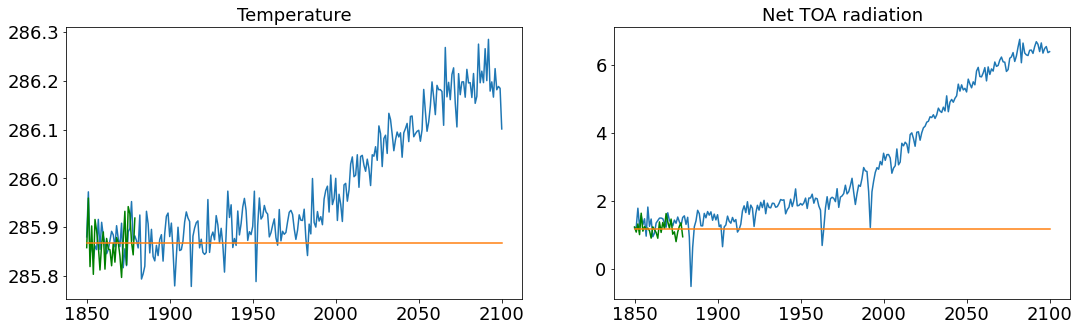

In [40]:
fig, ax = plt.subplots(figsize = [18,5], ncols = 2)
years = np.arange(1850, 1850+len(hist_tas))
piclimyears = years[:len(control_tas)]

ax[0].plot(years, hist_tas)
ax[0].plot(piclimyears, control_tas, color = 'green')
ax[0].plot(years,[control_tas.mean()]*len(hist_tas))
ax[0].set_title('Temperature',fontsize = 18)
print('Temperature difference for the last 20 years is on average', np.mean(hist_tas[-20:]) - control_tas.mean(), 'K')

ax[1].plot(years,histN)
ax[1].plot(piclimyears, controlN, color = 'green')
ax[1].plot(years,[controlN.mean()]*len(histN))
ax[1].set_title('Net TOA radiation',fontsize = 18)

for axes in ax:
    axes.tick_params(axis='both',labelsize=18)  

Text(0.5, 1.0, 'Fixed-SST effective radiative forcing')

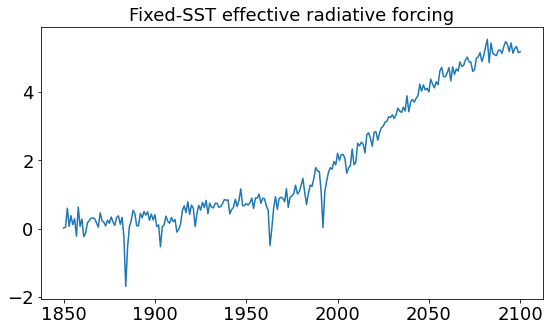

In [41]:
fig, ax = plt.subplots(figsize = [9,5])
effradf = histN - controlN.mean()
ax.plot(years,effradf);
ax.tick_params(axis='both',labelsize=18)  
ax.set_title('Fixed-SST effective radiative forcing',fontsize = 18)

## Loop through available models and members

NorESM2-LM
r1i1p1f1
Temperature difference for the last 20 years is on average 0.14146870735936545 K for model  NorESM2-LM
HadGEM3-GC31-LL
r1i1p1f3
Temperature difference for the last 20 years is on average 0.2808891547448411 K for model  HadGEM3-GC31-LL
GISS-E2-1-G
r1i1p1f1
Temperature difference for the last 20 years is on average nan K for model  GISS-E2-1-G
r1i1p1f2
Temperature difference for the last 20 years is on average 0.3140349744790001 K for model  GISS-E2-1-G
CNRM-CM6-1
r1i1p1f2
Temperature difference for the last 20 years is on average 0.08297729426703881 K for model  CNRM-CM6-1
IPSL-CM6A-LR
r1i1p1f1
Temperature difference for the last 20 years is on average 0.3314802196194364 K for model  IPSL-CM6A-LR
r2i1p1f1
Temperature difference for the last 20 years is on average 0.3304473875963936 K for model  IPSL-CM6A-LR
r3i1p1f1
Temperature difference for the last 20 years is on average 0.34040860150355456 K for model  IPSL-CM6A-LR
MIROC6
r1i1p1f1
Temperature difference for the l

/Users/hege-beatefredriksen/anaconda3/envs/CMIP6_hege/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/hege-beatefredriksen/anaconda3/envs/CMIP6_hege/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


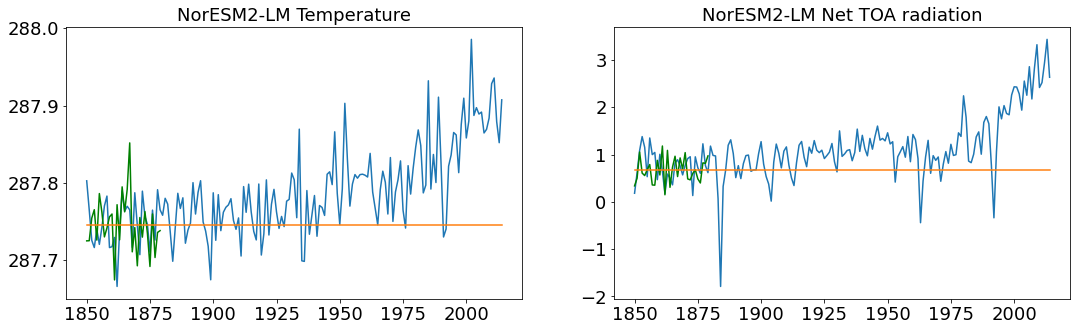

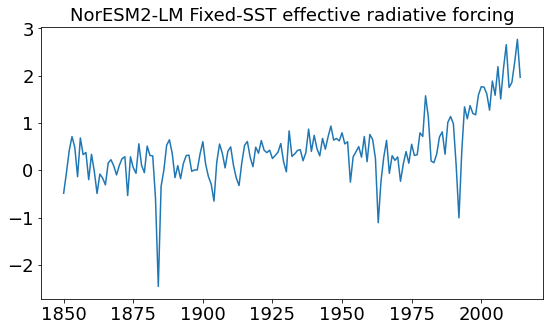

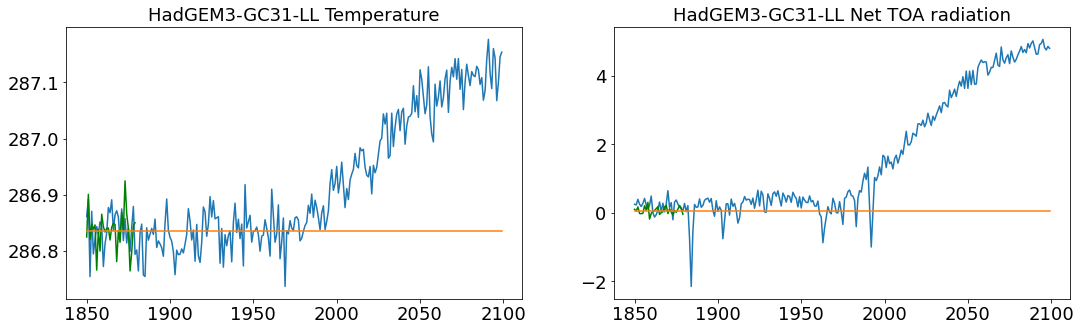

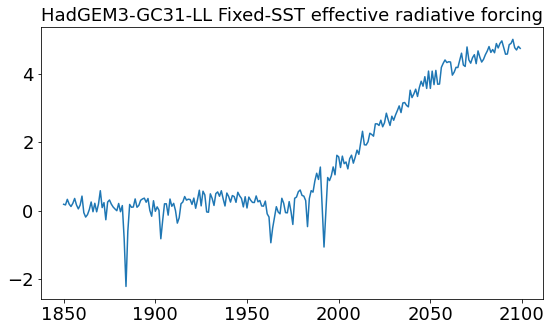

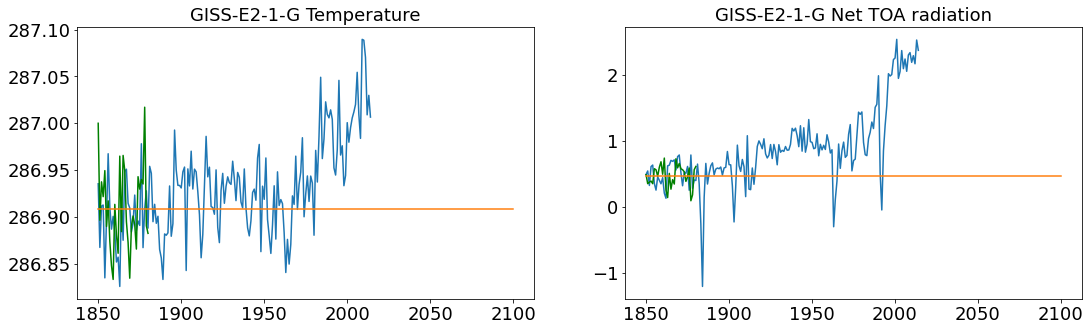

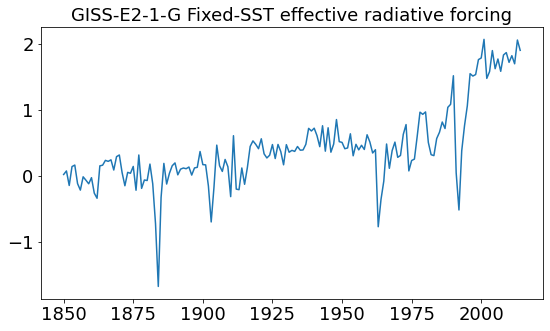

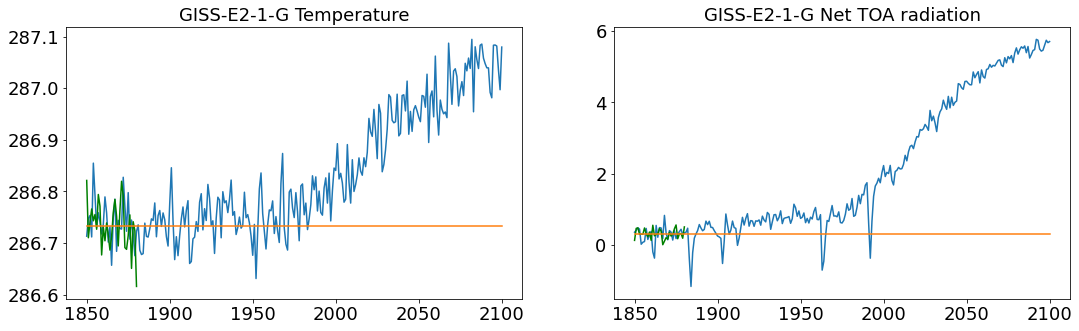

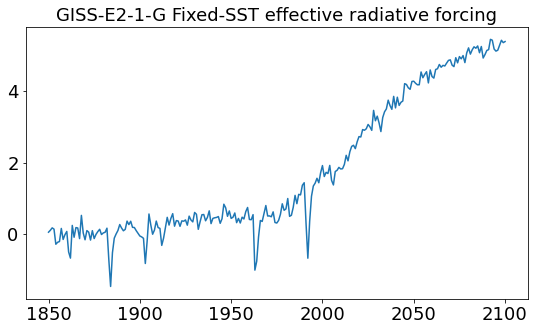

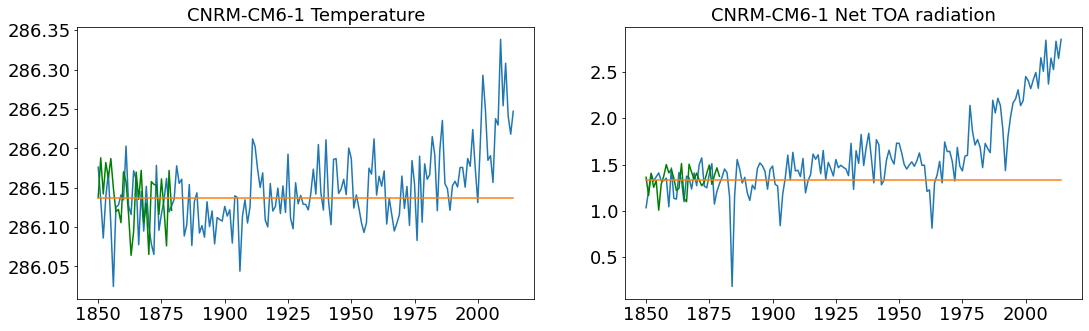

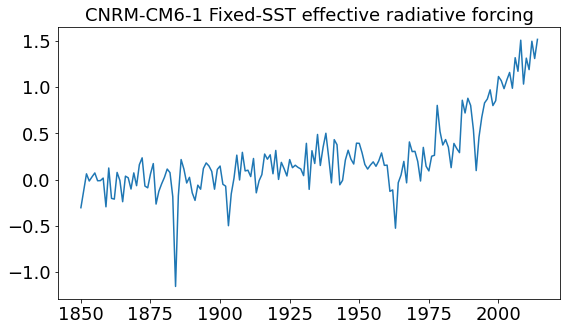

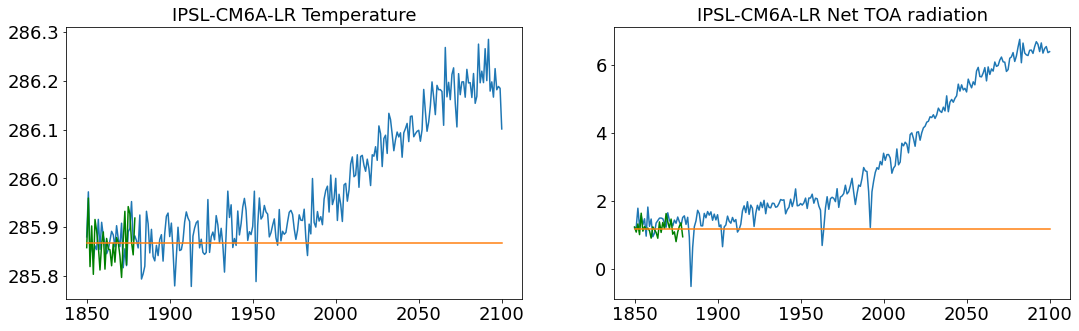

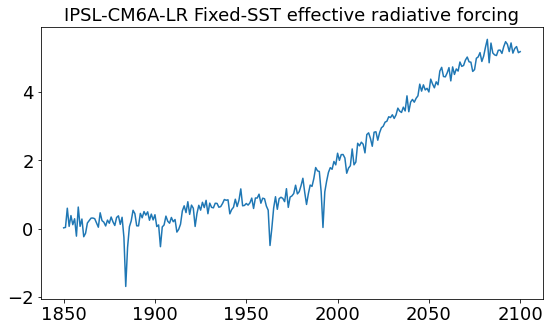

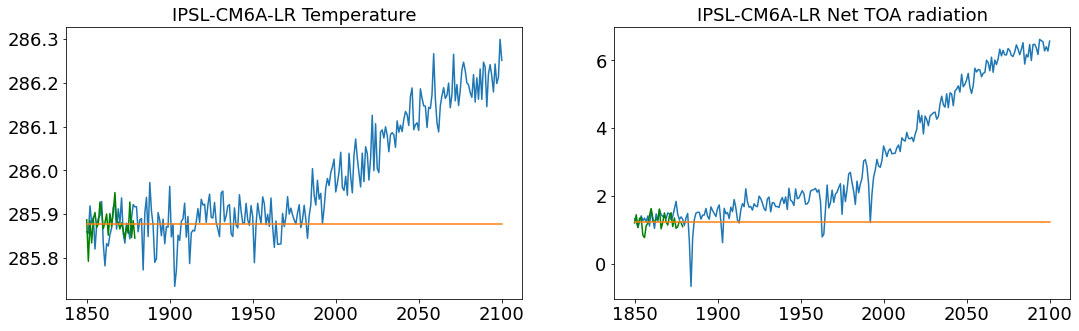

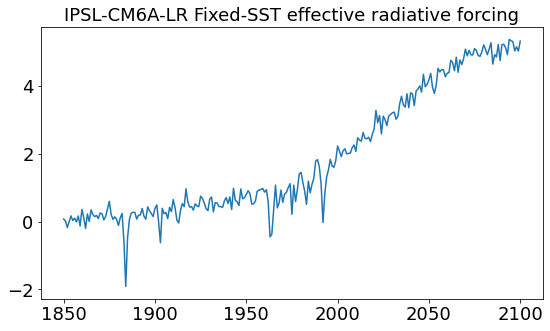

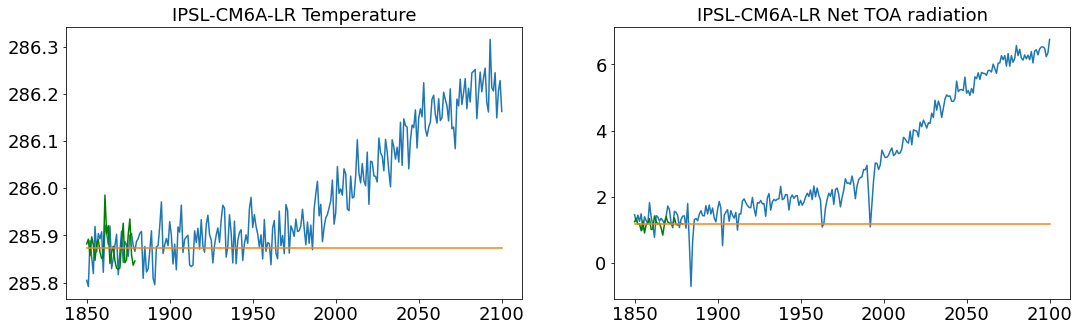

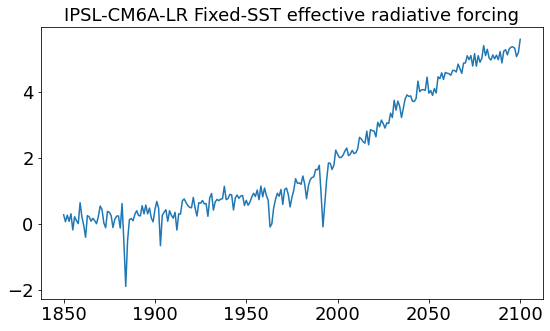

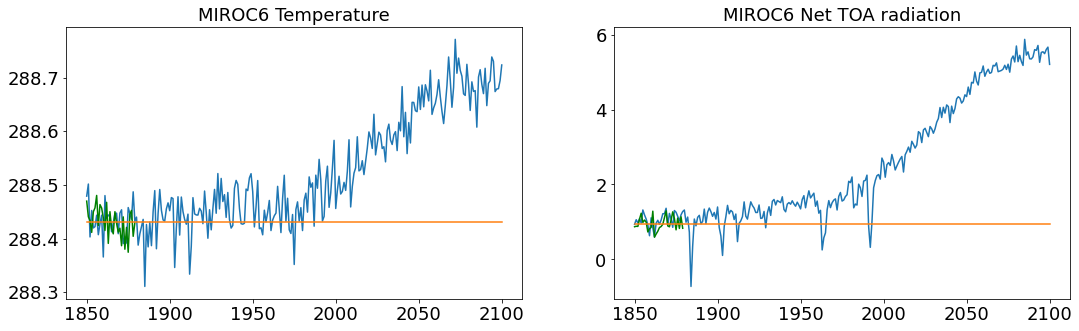

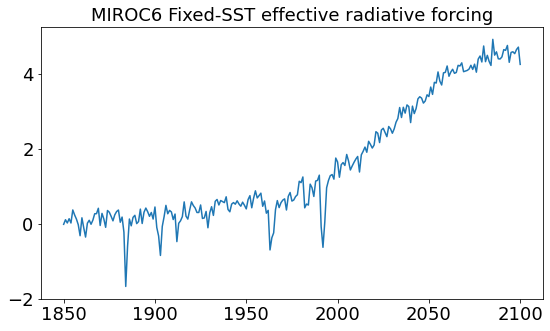

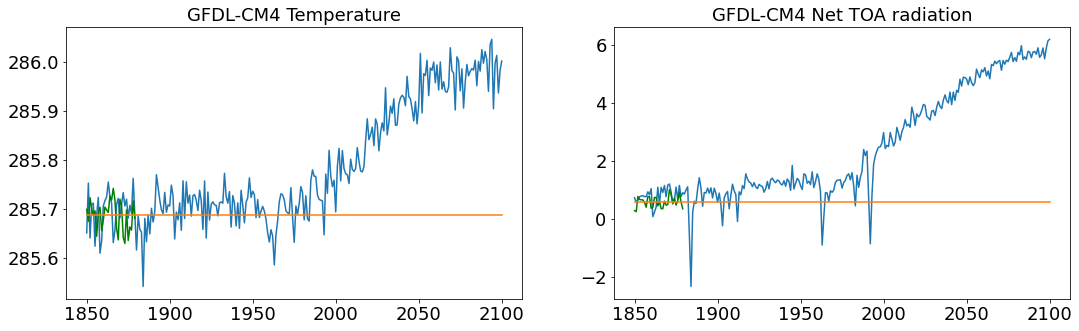

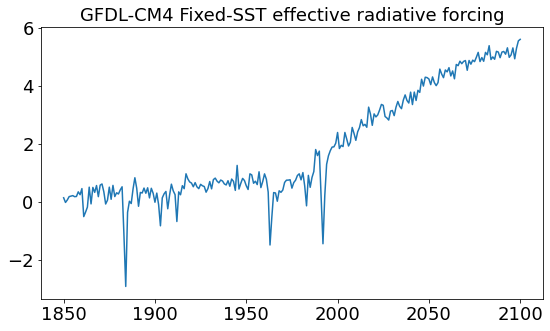

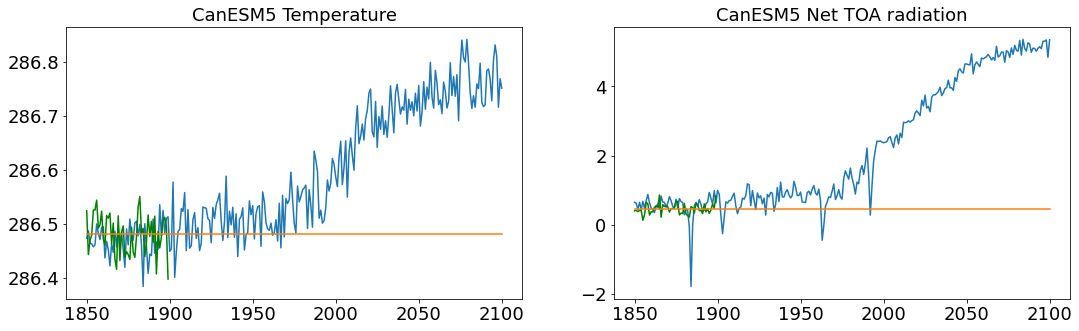

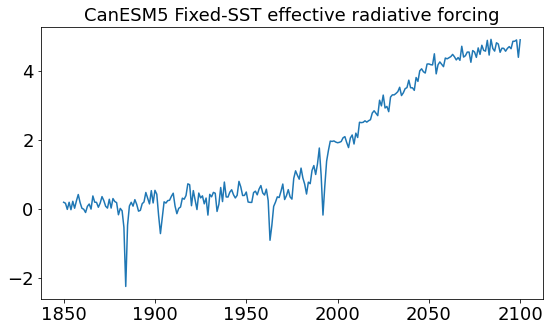

In [97]:
for model in experiments.keys():
    print(model)
    for histallmember in experiments[model]['piClim-histall']:
        if histallmember in experiments[model]['piClim-control']:
            member = histallmember
            print(member)

            # load files:
            piclimcontrol_path = '../Processed_data/Global_annual_means/' + model + '/piClim-control/'
            histall_path = '../Processed_data/Global_annual_means/' + model + '/piClim-histall/'

            histall_filename = model + '_piClim-histall_' + member + '_means.txt'
            exp_data = pd.read_table(histall_path + histall_filename, index_col=0, sep = ',')

            piclim_control_filename = model + '_piClim-control_' + member + '_means.txt'
            control_data = pd.read_table(piclimcontrol_path + piclim_control_filename, index_col=0, sep = ',')
            
            hist_tas = exp_data['tas']
            control_tas = control_data['tas']
            histN = exp_data['rsdt'] - exp_data['rsut'] - exp_data['rlut']
            controlN = control_data['rsdt'] - control_data['rsut'] - control_data['rlut']
    
            fig, ax = plt.subplots(figsize = [18,5], ncols = 2)
            years = np.arange(1850, 1850+len(hist_tas))
            piclimyears = years[:len(control_tas)]

            ax[0].plot(years, hist_tas)
            ax[0].plot(piclimyears, control_tas, color = 'green')
            ax[0].plot(years,[control_tas.mean()]*len(hist_tas))
            ax[0].set_title(model + ' Temperature',fontsize = 18)
            print('Temperature difference for the last 20 years is on average', np.mean(hist_tas[-20:]) - control_tas.mean(), 'K for model ', model)

            ax[1].plot(years,histN)
            ax[1].plot(piclimyears, controlN, color = 'green')
            ax[1].plot(years,[controlN.mean()]*len(histN))
            ax[1].set_title(model + ' Net TOA radiation',fontsize = 18)

            for axes in ax:
                axes.tick_params(axis='both',labelsize=18)  
                
            fig2, ax2 = plt.subplots(figsize = [9,5])
            effradf = histN - controlN.mean()
            ax2.plot(years,effradf);
            ax2.tick_params(axis='both',labelsize=18)  
            ax2.set_title(model + ' Fixed-SST effective radiative forcing',fontsize = 18)
            
            # write data to file
            index = pd.Index(years, name='Year')
            df_forcing = pd.DataFrame(effradf.values, index=index, columns=['ERF'])
            # save file
            modelfilename = model + '_' + member + '_transientERF.txt'
            df_forcing.to_csv('../Estimates/piClim-histall_forcing/' + modelfilename, sep='\t')
    

## Plot all estimates together in one figure

(1850.0, 2100.0)

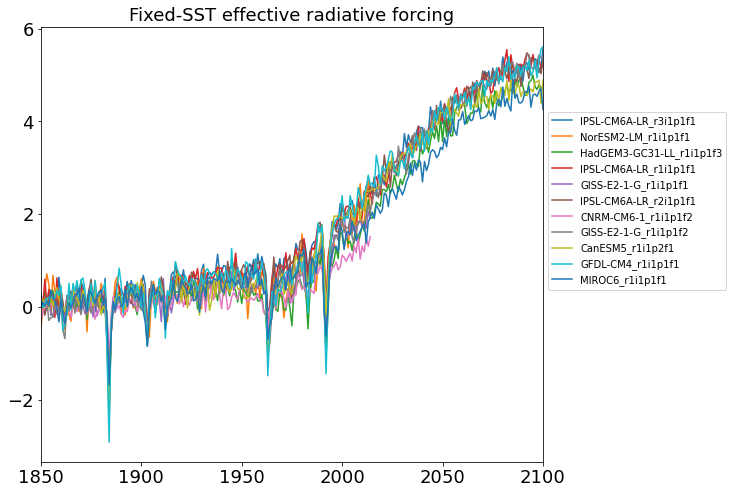

In [129]:
fig, ax = plt.subplots(figsize = [9,8])
ax.tick_params(axis='both',labelsize=18)  
ax.set_title('Fixed-SST effective radiative forcing',fontsize = 18)

directory = '../Estimates/piClim-histall_forcing/'
file_list = [ f.name for f in os.scandir(directory) if f.name !='.ipynb_checkpoints']
for file in file_list:
    data = pd.read_table(directory + file, index_col=0, sep = '\t')
    ax.plot(data['ERF'], label = file[:-17]);
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.6))
ax.set_xlim(1850, 2100)